<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 4 - Unsupervised Learning - K-Means Clustering and Hierarchical Clustering</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement two clustering models- K-Means and Hierarchical Clustering to segment customers based on their online transactions**



**Guidelines**
* Download `OnlineRetailData.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 4 - Unsupervised Learning - K-Means Clustering and Hierarchical Clustering (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

#### Read the content of the `OnlineRetailData.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a clustering model using K-Means clustering algorithm to segment the customers based on recency, frequency, and amount.  

> **Q1.5.** Build a clustering model using hierarchical clustering algorithm to segment the customers based on recency, frequency, and amount.

> **Q1.6.** Based on the clustering on Q1.4 and Q1.5, describe the customers in each cluster

In [460]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [461]:
dataset = pd.read_csv('OnlineRetailData.csv')


In [462]:
print(dataset.info())
print(dataset.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4293 non-null   float64
 1   Amount      4293 non-null   float64
 2   Frequency   4293 non-null   int64  
 3   Recency     4293 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 134.3 KB
None
CustomerID    0
Amount        0
Frequency     0
Recency       0
dtype: int64


In [463]:
print(dataset.head())
print(dataset.shape)

   CustomerID   Amount  Frequency  Recency
0     12346.0     0.00          2      325
1     12347.0  4310.00        182        1
2     12348.0  1797.24         31       74
3     12349.0  1757.55         73       18
4     12350.0   334.40         17      309
(4293, 4)


In [464]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# If df is not defined, define it using your actual dataset

# Check for duplicate rows
duplicate_rows = dataset.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows > 0:
    print("The dataset has duplicate rows.")
    print("Number of duplicate rows:", num_duplicate_rows)
else:
    print("The dataset does not have any duplicate rows.")


The dataset does not have any duplicate rows.


In [465]:
# Check for duplicate CustomerId values
duplicate_customer_ids =dataset['CustomerID'].duplicated()

# Count the number of duplicate CustomerIds
num_duplicates = duplicate_customer_ids.sum()

if num_duplicates > 0:
    print("The CustomerId column has duplicate values.")
    print("Number of duplicate CustomerIds:", num_duplicates)
else:
    print("The CustomerId column does not have any duplicate values.")

The CustomerId column does not have any duplicate values.


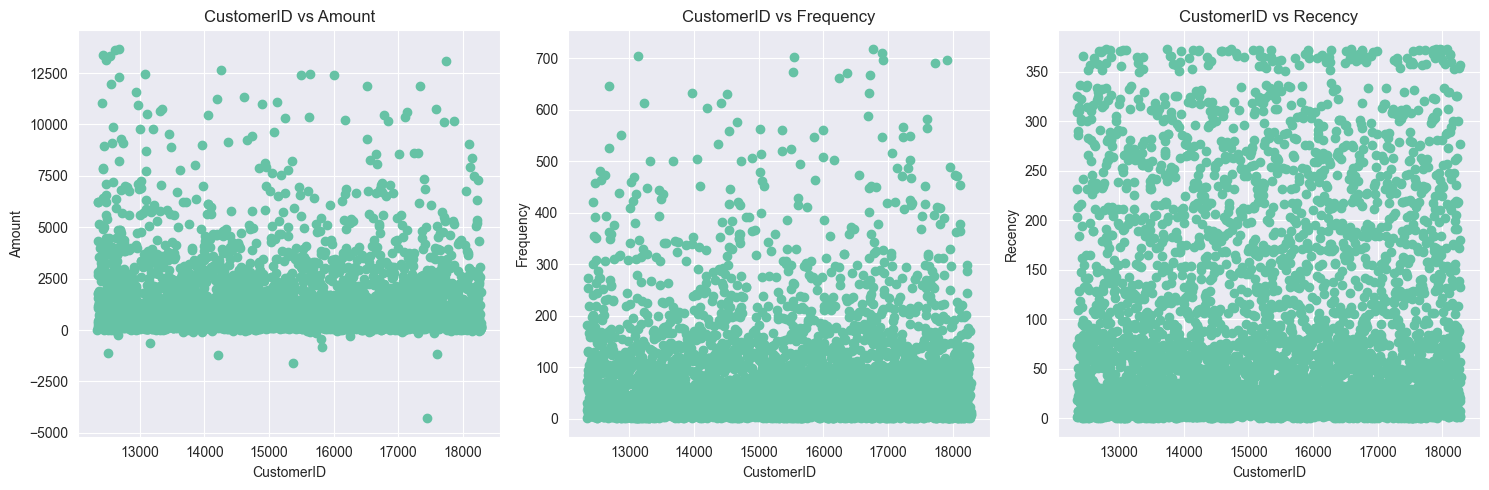

In [466]:
import matplotlib.pyplot as plt

# Assuming dataset is your DataFrame containing the dataset
# If dataset is not defined, define it using your actual dataset

plt.figure(figsize=(15, 5))

# Define the features and titles
features = ['Amount', 'Frequency', 'Recency']
titles = ['CustomerID vs Amount', 'CustomerID vs Frequency', 'CustomerID vs Recency']

# Plot the scatter plots
for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)
    plt.scatter(dataset['CustomerID'], dataset[feature])
    plt.xlabel('CustomerID')
    plt.ylabel(feature)
    plt.title(titles[i - 1])

plt.tight_layout()
plt.show()


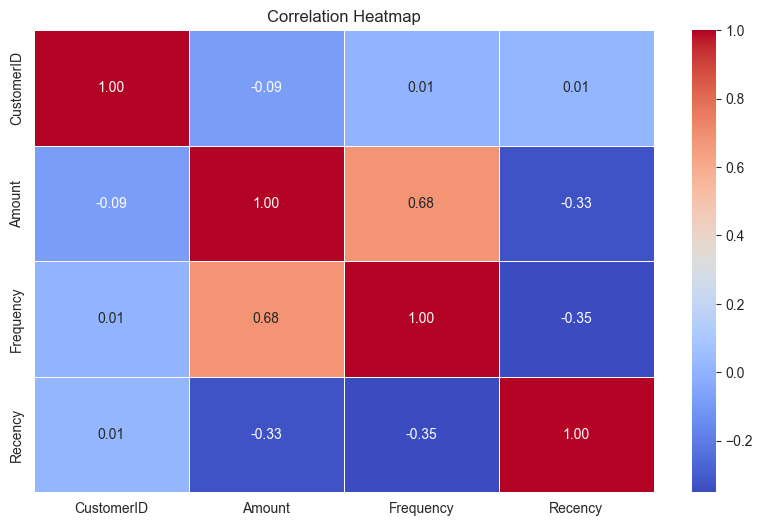

In [467]:
corr_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [468]:
dataset.drop(columns=['CustomerID'],inplace=True)

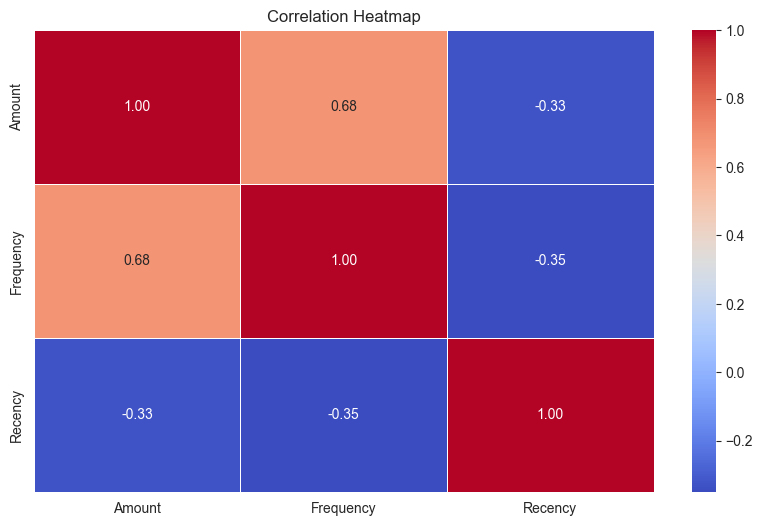

In [469]:
corr_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

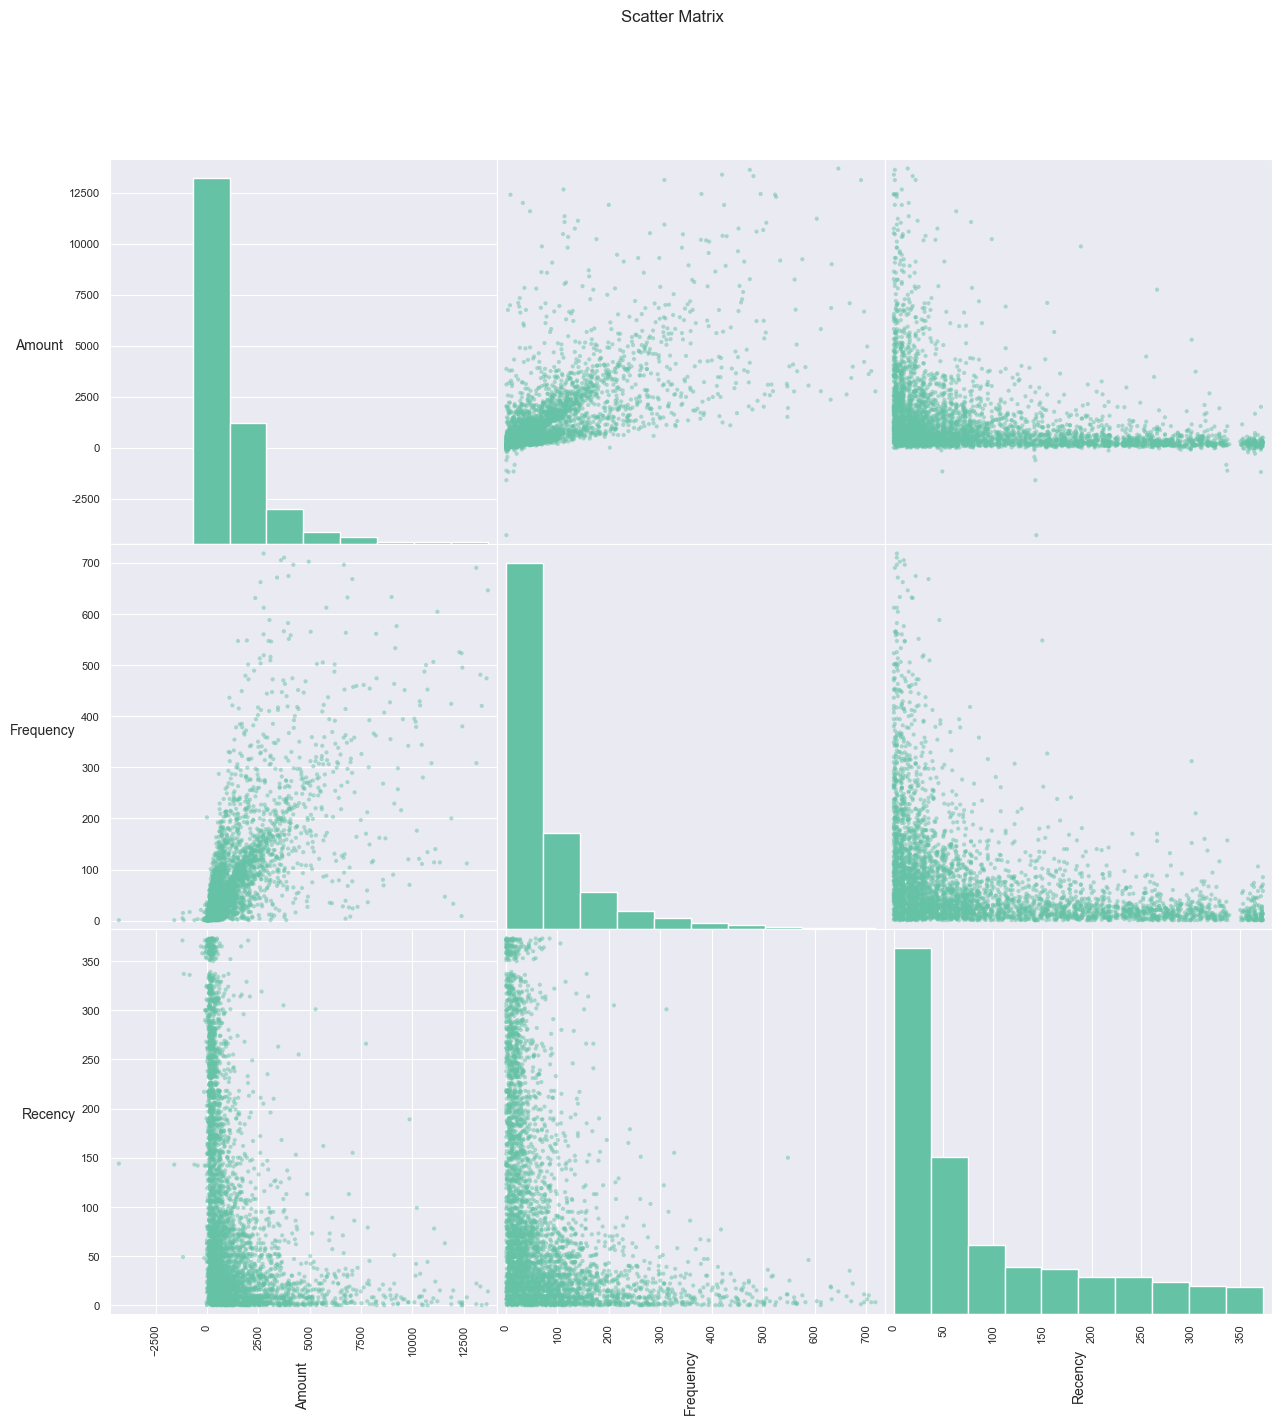

In [470]:
scatter_matrix = pd.plotting.scatter_matrix(dataset, figsize=(15, 15), diagonal='hist')

# Add titles to the diagonal plots
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0, ha='right')

# Show the scatter matrix
plt.suptitle('Scatter Matrix')
plt.show()

In [471]:
# # Initialize MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the dataset
# dataset_scaled = scaler.fit_transform(dataset)

# # Convert the scaled data back to a DataFrame
# dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)

# # Print the shape of the scaled dataset
# print("Shape of scaled dataset:", dataset_scaled.shape)


scaler = StandardScaler()

dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled.shape

(4293, 3)

In [472]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming dataset is your DataFrame containing the dataset
# # If dataset is not defined, define it using your actual dataset

# # Calculate Z-scores for each column
# z_scores = (dataset_scaled - dataset_scaled.mean()) / dataset_scaled.std()

# # Define threshold for identifying outliers (e.g., Z-score > 3 or < -3)
# threshold = 3

# # Identify outliers
# outliers = (z_scores > threshold) | (z_scores < -threshold)

# # Visualize outliers using boxplots
# plt.figure(figsize=(12, 5))
# sns.boxplot(data=dataset[outliers.any(axis=1)])
# plt.title('Boxplot of Outliers')
# plt.xlabel('Features')
# plt.ylabel('Values')
# plt.xticks(rotation=45)
# plt.show()

# # Remove outliers from the dataset
# dataset_cleaned = dataset[~outliers.any(axis=1)]

# # Update the dataset without outliers
# dataset = dataset_cleaned


In [473]:
variations = []
range_n_clusters = range(2,8)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    variations.append(kmeans.inertia_)

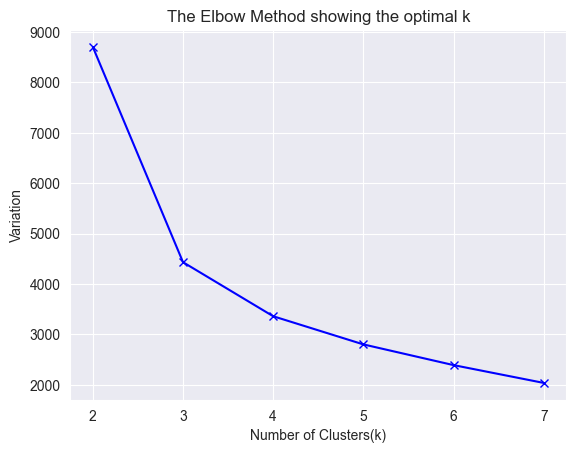

In [474]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [475]:
# Silhouette analysis
range_n_clusters = range(2,8)

optimal_num_clusters = 0
max_silhouette_score = 0

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters=num_clusters
    
print("Optimal number of clusters = {}".format(optimal_num_clusters))
    

For n_clusters=2, the silhouette score is 0.4025940739563748
For n_clusters=3, the silhouette score is 0.5085084004374336
For n_clusters=4, the silhouette score is 0.48506020563508856
For n_clusters=5, the silhouette score is 0.46399070900769845
For n_clusters=6, the silhouette score is 0.4168639141649017
For n_clusters=7, the silhouette score is 0.4150058806779277
Optimal number of clusters = 3


In [488]:
kmeans = KMeans(n_clusters=optimal_num_clusters, max_iter=50)
kmeans.fit(dataset_scaled)
print(kmeans)

KMeans(max_iter=50, n_clusters=3)


Text(0.5, 1.0, "Person's Weights Vs. Heights")

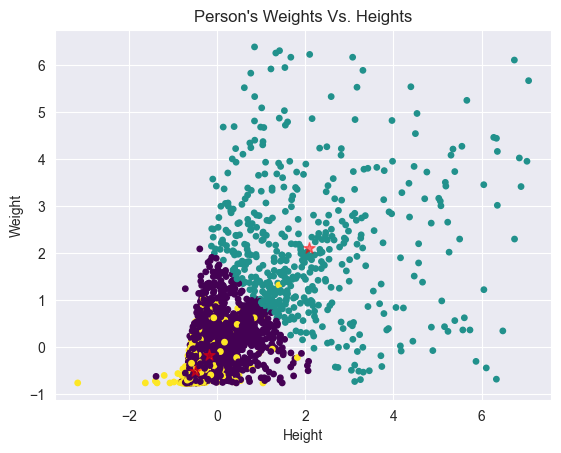

In [489]:
centroids = kmeans.cluster_centers_
plt.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], s=15, c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=70, alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Person\'s Weights Vs. Heights')

In [490]:
dataset['km_clusters'] = kmeans.labels_

In [491]:
dataset.head()

,Amount,Frequency,Recency,km_clusters
0,0.00,2,325,2
1,4310.00,182,1,1
2,1797.24,31,74,0
3,1757.55,73,18,0
4,334.40,17,309,2


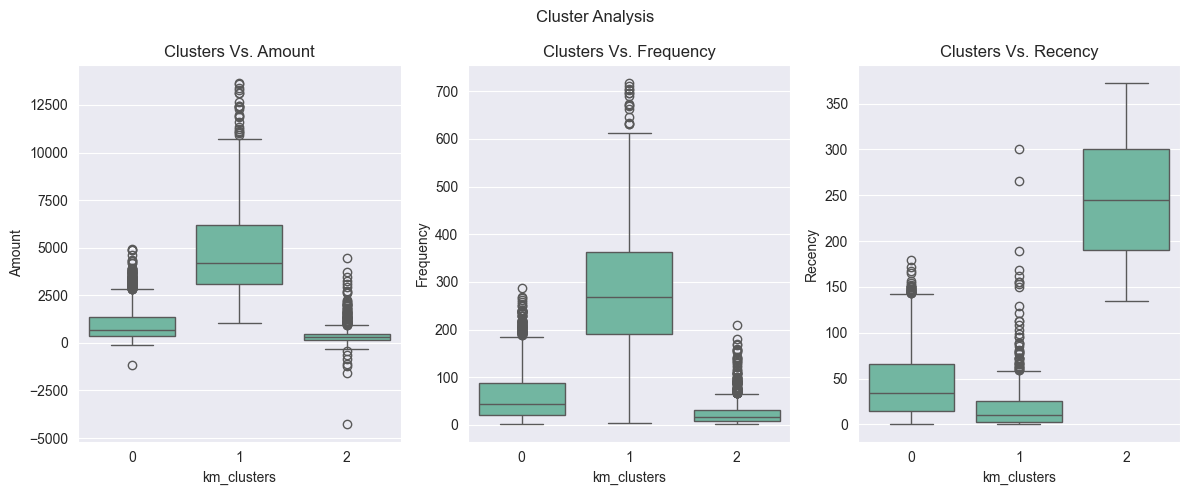

In [492]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Define the columns for which to create boxplots
columns = ['Amount', 'Frequency', 'Recency']

# Iterate over the columns and create boxplots
for i, column in enumerate(columns, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='km_clusters', y=column, data=dataset)
    plt.title(f'Clusters Vs. {column}')

# Add a title for the entire plot
plt.suptitle('Cluster Analysis')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [481]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming dataset is your DataFrame containing the dataset
# # If dataset is not defined, define it using your actual dataset

# # Drop CustomerId column if it's present
# dataset_no_id = dataset.drop(columns=['CustomerID'], errors='ignore')

# # Calculate Z-scores for each column
# z_scores = (dataset_no_id - dataset_no_id.mean()) / dataset_no_id.std()

# # Set threshold for identifying outliers (e.g., Z-score > 3 or < -3)
# threshold = 3

# # Identify outliers
# outliers = (z_scores > threshold) | (z_scores < -threshold)

# # Visualize outliers using boxplots
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=dataset_no_id[outliers.any(axis=1)], orient='h')
# plt.title('Boxplot of Outliers')
# plt.xlabel('Value')
# plt.ylabel('Features')
# plt.show()

# # Visualize outliers using scatter plots
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(dataset_no_id.columns):
#     plt.subplot(2, 2, i+1)
#     sns.scatterplot(x=dataset_no_id.index, y=col, data=dataset_no_id, hue=outliers[col], palette='Set1')
#     plt.title(f'Scatter plot of {col}')
#     plt.xlabel('Index')
#     plt.ylabel(col)
# plt.tight_layout()
# plt.show()


In [482]:
# Q1.1. Preprocess and clean the dataset (Note: Make sure to document your preprocessing step): This step should include the following:


In [483]:
# Q1.2. Visualize the dataset
???

Object `?` not found.


In [484]:
# Q1.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability
???

Object `?` not found.


In [485]:
# Q1.4. Build a clustering model using K-Means clustering algorithm to segment the customers based on recency, frequency, and amount.
???

Object `?` not found.


In [486]:
# Q1.5. Build a clustering model using hierarchical clustering algorithm to segment the customers based on recency, frequency, and amount.
???

Object `?` not found.


In [487]:
# Q1.6. Based on the clustering on Q1.4 and Q1.5, describe the customers in each cluster
???

Object `?` not found.


<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

???

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab4.ipynb** to the **Lab 4 - Unsupervised Learning - K-Means Clustering and Hierarchical Clustering (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                          | Good                                               | Average                                                    | Below Average                                               | Poor                                                         | No Attempt                                                  |
| ----------------------------------------- | --------------------------------------------------- | --------------------------------------------------- | ---------------------------------------------------------- | ----------------------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.2         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.3         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.4         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.5         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.6         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection                     |
